In [1]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1

#                                    Prompt Engineering - zero/few shot 

#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


# This cell creates train test data splits ( already Provided nothing new)



# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



FileNotFoundError: [Errno 2] No such file or directory: 'Combined/Train/LAYING'

Context of this jupyter notebook

1. importing required libraries, setting up LLMs and passing API key.
2. Provided demo of sentiment analysis performed with Groq and GPT4FREE
3. Zero shot for raw data(500X3) using 10 quries
4. few shot for raw data(500X3) using 10 examples and 6 queries
5. Loading feature data
6. Zero shot for featured data with 10 random input queries
7. Few shot for featured data with 10 random examples and 10 input queries
8. few shot for raw data(500X3) using full test data as query
9. zero shot for raw data(500X3) using 10 random examples and full test data as query
10. Q1 explanation
11. few shot for featured data big chunk (100 queries)
12. Q4 Explanation
13. Zero shot for Raw Data , full test data (magnitude)
14. few shot for raw data, full test data prediction (magnitude)
15. Q2 explanation -- comparison with decision tree
16. Applied PCA , n = 2
17. Few shot with PCA featurised data , 50 queries, 10 random examples
18. zero shot with PCA featurised data , 50 queries
19. Q5 explanation 
20. tesing on random generated data
21. Q3 explanation


In [5]:
import pandas as pd 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
#!pip install langchain_groq
from langchain_groq.chat_models import ChatGroq

# Groq API and Models
import json
from g4f.client import Client

client = Client()


## loading the API key file, it is added to .gitignore so the file won't be visible,
## and the Key won't be visible bcz it's not being printed.
with open('api.json') as config_file:
    api_file = json.load(config_file)
Groq_Token = api_file['apiKey']
#Groq_Token = "YOU_API_KEY_GOES_HERE"  # Do not share this key with anyone

groq_models = {"llama3-70b": "llama3-70b-8192", "mixtral": "mixtral-8x7b-32768", "gemma-7b": "gemma-7b-it","llama3.1-70b":"llama-3.1-70b-versatile","llama3-8b":"llama3-8b-8192","llama3.1-8b":"llama-3.1-8b-instant","gemma-9b":"gemma2-9b-it"}

In [75]:
####   Provided demo of sentiment analysis performed with Groq and GPT4FREE


# Statement 
sentence = "The product quality is amazing but the delivery was delayed. However I am happy with the customer service."

# System Prompts 
query = f"""
* You are a sentiment analysis model. 
* Your task is to analyze the sentiment expressed in the given text and classify it as 'positive', 'negative', or 'neutral'. 
* Provide the sentiment label and, if necessary, a brief explanation of your reasoning.

Sentence: {sentence}
""" 

# To use Groq LLMs 
model_name = "mixtral" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)


response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": query}],
)
print(response.choices[0].message.content)

print('%'*10)

print(answer.content)

Sentiment: Neutral

Explanation: The sentence contains both positive and negative sentiments. The phrase "the product quality is amazing" expresses a positive sentiment, while "the delivery was delayed" conveys a negative sentiment. However, the concluding remark "I am happy with the customer service" adds another positive aspect. Overall, the mixed sentiments balance each other out, leading to a neutral classification.
%%%%%%%%%%
Sentiment: Positive

Explanation: The sentence expresses a positive sentiment overall. The product quality is described as "amazing," which is a clear indicator of a positive experience. Although the delivery was delayed, the customer's satisfaction with the customer service suggests a positive outcome. The happiness mentioned in relation to customer service further supports the positive sentiment.


[2 5 4 2 4 4 5 1 2 5]
%%%%%%%%%%
[2 6 5 2 2 2 1 1 5 4]
[2 5 4 2 4 4 5 1 2 5]
%%%%%%%%%%
[2 6 5 2 2 2 1 1 5 4]
Accuracy: 0.3


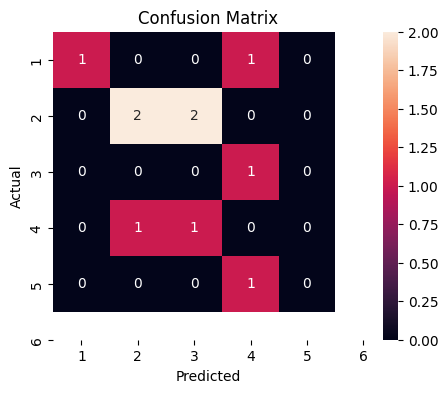

c:\Users\Sky\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py:88: UserWarning: Curlm alread closed! quitting from process_data
  self._context.run(self._callback, *self._args)
c:\Users\Sky\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py:88: UserWarning: Curlm alread closed! quitting from process_data
  self._context.run(self._callback, *self._args)


In [136]:
# Zero shot for raw data(500X3) using 10 quries

data = X_train[0:10][:][:]

# System Prompts 
query = f"""
 your task is to predict the type of movement done by a perticular person based
 on the accelerometer data provided to you. i will provide 3 vectors 1 for total
 acceleration in x direction one for y direction and 1 for z direction. the data
 is of 10 second activity sampled at 50hz frequency so there are 500 readings in
 each direction.
 you need to choose from the folowwing categories - 
  1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'            

please provide only nd array (x,) of numbers as answer for all queries together and nothing else

    data : f'{data}
""" 

# To use Groq LLMs 
#model_name = "mixtral" # We can choose any model from the groq_models dictionary
#llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
#answer = llm.invoke(query)


response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": query}],
)
print(response.choices[0].message.content)

print('%'*10)

#print(answer.content)
#print(y_train[0:10][:][:])
y_pred_llm = (response.choices[0].message.content).split('[')[1].split(']')[0]
clean_str = y_pred_llm.replace(' ', ',')
y_pred_llm = np.fromstring(clean_str, dtype=int, sep=',')

# Convert to ndarray
y_pred_llm = np.array(y_pred_llm)
print(y_pred_llm)

print('%'*10)

#print(answer.content)
y_act = y_train[0:10][:][:]
print(y_act)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


accuracy = accuracy_score(y_act, y_pred_llm)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_act, y_pred_llm)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

[2 4 6 4 5 1]
%%%%%%%%%%
[3 3 5 6 5 1]
Accuracy: 0.3333333333333333


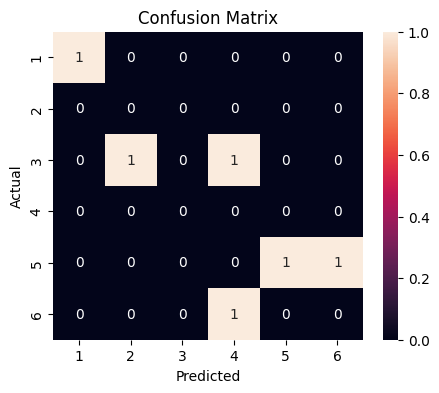

In [128]:
# few shot for raw data(500X3) using 10 examples and 6 queries

data = X_train[10:20][:][:]
label = y_train[10:20][:][:]

predict_for = X_train[20:26][:][:]

# System Prompts 
query = f"""
 your task is to predict the type of movement done by a perticular person based
 on the accelerometer data provided to you. i will provide 3 vectors 1 for total
 acceleration in x direction one for y direction and 1 for z direction. the data
 is of 10 second activity sampled at 50hz frequency so there are 500 readings in
 each direction.
 you need to choose from the folowwing categories - 
  1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'            

    i am providing 10 examples for your reference 
    and 6 queries for prediction
    
here are some examples,
    data : f'{data}
    labels : f'{label}
now you predict.
    predict for : f'{predict_for}

please provide only nd array (x,) of numbers as answer for all queries together and nothing else
""" 

# To use Groq LLMs 
#model_name = "mixtral" # We can choose any model from the groq_models dictionary
#llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
#answer = llm.invoke(query)


response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": query}],
)
#print(response.choices[0].message.content)
y_pred_llm = (response.choices[0].message.content).split('[')[1].split(']')[0]
clean_str = y_pred_llm.replace(' ', ',')
y_pred_llm = np.fromstring(clean_str, dtype=int, sep=',')

# Convert to ndarray
y_pred_llm = np.array(y_pred_llm)
print(y_pred_llm)

print('%'*10)

#print(answer.content)
y_act = y_train[20:26][:][:]
print(y_act)

accuracy = accuracy_score(y_act, y_pred_llm)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_act, y_pred_llm)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




In [6]:
#loading featured data

# Read the file
with open('./UCI HAR Dataset/features.txt', 'r') as file:
    features = file.readlines()

# Remove any leading/trailing whitespace characters like `\n`
features = [feature.strip() for feature in features]

# Load the file
file_path = './UCI HAR Dataset/train/X_train.txt'

# Read the entire content of the file
with open(file_path, 'r') as file:
    content = file.read()

# Split the content into a list of elements
elements = content.split()

# Ensure the total number of elements is a multiple of 561
assert len(elements) % 561 == 0, "The number of elements is not a multiple of 561!"

# Split the elements into chunks of 561
chunks = [elements[i:i + 561] for i in range(0, len(elements), 561)]

# Convert the chunks into a DataFrame
X_data_feature_train= pd.DataFrame(chunks)
X_data_feature_train.columns = features
X_data_feature_train.shape

# Read the file
with open('./UCI HAR Dataset/features.txt', 'r') as file:
    features = file.readlines()

# Remove any leading/trailing whitespace characters like `\n`
features = [feature.strip() for feature in features]

# Load the file
file_path = './UCI HAR Dataset/test/X_test.txt'

# Read the entire content of the file
with open(file_path, 'r') as file:
    content = file.read()

# Split the content into a list of elements
elements = content.split()

# Ensure the total number of elements is a multiple of 561
assert len(elements) % 561 == 0, "The number of elements is not a multiple of 561!"

# Split the elements into chunks of 561
chunks = [elements[i:i + 561] for i in range(0, len(elements), 561)]

# Convert the chunks into a DataFrame
X_data_feature_test= pd.DataFrame(chunks)
X_data_feature_test.columns = features
# Display the first few rows of the DataFrame
#print(X_data_feature.head())
X_data_feature_test.shape

y_data_feature_train = pd.read_csv('./UCI HAR Dataset/train/y_train.txt', header=None)
y_data_feature_train.columns = ['Activity']

y_data_feature_test = pd.read_csv('./UCI HAR Dataset/test/y_test.txt', header=None)
y_data_feature_test.columns = ['Activity']

[7025, 1967, 6237, 5784, 5394, 2344, 1931, 5197, 2343, 2927]
```python
import numpy as np

# Assuming the predictions based on the provided data are as follows
predictions = np.array([1, 1, 1, 4, 4, 4, 5, 5, 5, 6])
```
%%%%%%%%%%
[1 1 1 4 4 4 5 5 5 6]
%%%%%%%%%%
[4, 6, 2, 1, 1, 3, 4, 1, 3, 4]
Accuracy: 0.0


C:\Users\Sky\AppData\Local\Temp\ipykernel_24756\2855469614.py:64: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_act.append(int(y_data_feature_train[j:j+1][:].values))


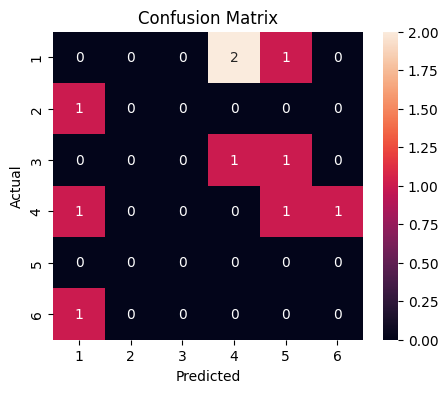

In [150]:
#zero shot for featured data

numbers = []
data = []
for i in range(10):
    number = np.random.randint(7352)
    numbers.append(number)
    data.append(X_data_feature_train[number:number+1][:])
print(numbers)



# System Prompts 
query = f"""
 your task is to predict the type of movement done by a perticular person based
 on the accelerometer and gyrometer data provided to you. i will provide 561 vectors for different
 features.
 you need to choose from the folowwing categories - 
  1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'            

please provide only nd array (x,) of numbers as answer for all queries together and nothing else

    data : f'{data}
""" 

# To use Groq LLMs 
#model_name = "mixtral" # We can choose any model from the groq_models dictionary
#llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
#answer = llm.invoke(query)


response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": query}],
)
print(response.choices[0].message.content)

print('%'*10)

y_pred_llm = (response.choices[0].message.content).split('[')[1].split(']')[0]
y_pred_llm = np.fromstring(y_pred_llm, dtype=int, sep=',')

# Convert to ndarray
y_pred_llm = np.array(y_pred_llm)
print(y_pred_llm)

print('%'*10)

#print(answer.content)
y_act = []
for j in numbers:
    y_act.append(int(y_data_feature_train[j:j+1][:].values))

print(y_act)


accuracy = accuracy_score(y_act, y_pred_llm)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_act, y_pred_llm)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

[716, 4184, 570, 4766, 148, 4672, 2720, 679, 3705, 6475]
```python
import numpy as np

predictions = np.array([5, 5, 5, 1, 4, 5, 2, 6, 6, 5])
```
%%%%%%%%%%
[5 5 5 1 4 5 2 6 6 5]
%%%%%%%%%%
[4, 5, 4, 6, 3, 3, 5, 2, 6, 5]
Accuracy: 0.3


C:\Users\Sky\AppData\Local\Temp\ipykernel_24756\424094641.py:75: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_act.append(int(y_data_feature_train[j:j+1][:].values))


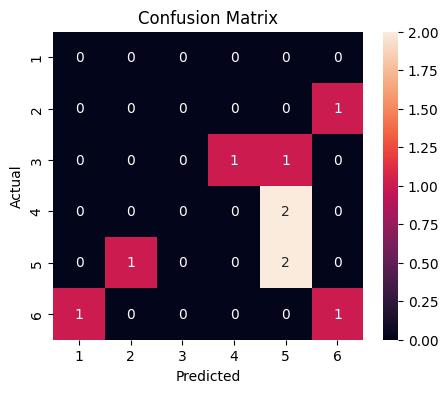

c:\Users\Sky\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py:88: UserWarning: Curlm alread closed! quitting from process_data
  self._context.run(self._callback, *self._args)
c:\Users\Sky\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py:88: UserWarning: Curlm alread closed! quitting from process_data
  self._context.run(self._callback, *self._args)


In [153]:
#few shot for featured data

numbers = []
data = []
labels = []
predictfor = []
for i in range(10):
    number = np.random.randint(7352)
    number1 = np.random.randint(7352)
    numbers.append(number1)
    data.append(X_data_feature_train[number:number+1][:])
    labels.append(y_data_feature_train[number:number+1][:])
    predictfor.append(X_data_feature_train[number:number+1][:])
print(numbers)



# System Prompts 
query = f"""
 your task is to predict the type of movement done by a perticular person based
 on the accelerometer and gyrometer data provided to you. i will provide 561 vectors for different
 features.
 you need to choose from the folowwing categories - 
  1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'            

I am providing 10 examples with labels.
    data : f'{data}
    labels : f'{labels}
now you predict for below 10 entries
    predict for : f'{predictfor}

please provide only nd array (x,) of numbers as answer for all queries together and nothing else

""" 

# To use Groq LLMs 
#model_name = "mixtral" # We can choose any model from the groq_models dictionary
#llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
#answer = llm.invoke(query)


response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": query}],
)
print(response.choices[0].message.content)

print('%'*10)


y_pred_llm = (response.choices[0].message.content).split('[')[1].split(']')[0]
y_pred_llm = np.fromstring(y_pred_llm, dtype=int, sep=',')

# Convert to ndarray
y_pred_llm = np.array(y_pred_llm)
print(y_pred_llm)

print('%'*10)

#print(answer.content)
y_act = []
for j in numbers:
    y_act.append(int(y_data_feature_train[j:j+1][:].values))

print(y_act)

accuracy = accuracy_score(y_act, y_pred_llm)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_act, y_pred_llm)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#print(answer.content)



[119, 68, 106, 69, 31, 102, 94, 48, 111, 61]
```python
array([1, 4, 5, 5, 2, 1, 3, 6, 6, 5, 1, 2, 4, 5, 3, 1, 4, 6, 6, 5, 1, 3, 2, 6, 5, 4, 3, 1, 2, 5, 6, 4, 1, 3, 2, 5, 4, 3, 1, 6, 5, 2, 1, 4, 3, 5, 6, 2, 1, 4, 5, 3, 2, 1])
```
%%%%%%%%%%
[1 4 5 5 2 1 3 6 6 5 1 2 4 5 3 1 4 6 6 5 1 3 2 6 5 4 3 1 2 5 6 4 1 3 2 5 4
 3 1 6 5 2 1 4 3 5 6 2 1 4 5 3 2 1]
%%%%%%%%%%
[3 1 2 5 5 1 1 5 3 2 6 5 6 5 6 1 6 5 2 5 4 3 2 2 1 4 6 4 1 2 6 2 4 4 3 6 6
 3 1 5 3 2 1 4 4 4 5 1 3 3 3 6 2 4]
Accuracy: 0.2777777777777778


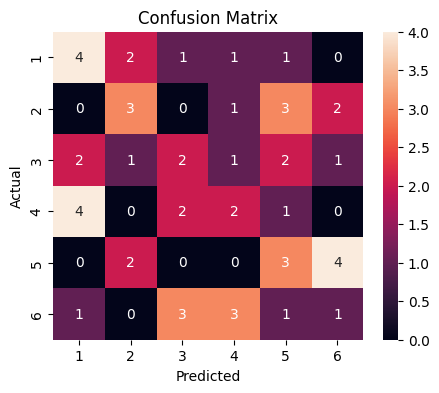

In [193]:
#few shot for raw data, full test data prediction

numbers = []
data = []
labels = []
predictfor = X_test
for i in range(10):
    number = np.random.randint(126)
    #number1 = np.random.randint(7352)
    numbers.append(number)
    data.append(X_train[number:number+1][:])
    labels.append(y_train[number:number+1][:])
    #predictfor.append(X_data_feature_train[number:number+1][:])
print(numbers)



# System Prompts 
query = f"""
 your task is to predict the type of movement done by a perticular person based
 on the accelerometer and gyrometer data provided to you. i will provide 561 vectors for different
 features.
 you need to choose from the folowwing categories - 
  1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'            

I am providing 10 examples with labels.
    data : f'{data}
    labels : f'{labels}
now you predict for all the 54 below entries
    predict for : f'{predictfor}

please provide only nd array (x,) of numbers as answer for all queries together and nothing else

""" 

# To use Groq LLMs 
#model_name = "mixtral" # We can choose any model from the groq_models dictionary
#llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
#answer = llm.invoke(query)


response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": query}],
)
print(response.choices[0].message.content)

print('%'*10)


y_pred_llm = (response.choices[0].message.content).split('[')[1].split(']')[0]
y_pred_llm = np.fromstring(y_pred_llm, dtype=int, sep=',')

# Convert to ndarray
y_pred_llm = np.array(y_pred_llm)
print(y_pred_llm)

print('%'*10)

#print(answer.content)
y_act = y_test
#for j in numbers:
#    y_act.append(int(y_data_feature_train[j:j+1][:].values))

print(y_act)

accuracy = accuracy_score(y_act, y_pred_llm)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_act, y_pred_llm)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#print(answer.content)



[4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
%%%%%%%%%%
[4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
%%%%%%%%%%
[3 1 2 5 5 1 1 5 3 2 6 5 6 5 6 1 6 5 2 5 4 3 2 2 1 4 6 4 1 2 6 2 4 4 3 6 6
 3 1 5 3 2 1 4 4 4 5 1 3 3 3 6 2 4]
Accuracy: 0.12962962962962962


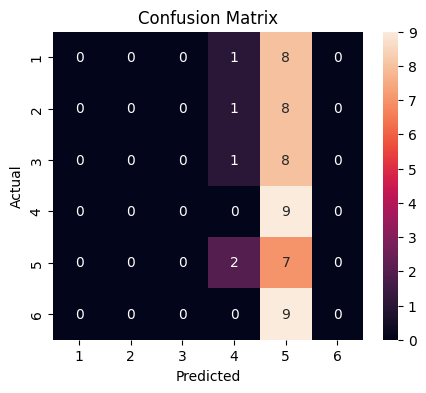

In [224]:
# Zero shot for Raw Data , full test data

data = X_test
# System Prompts 
query = f"""
 your task is to predict the type of movement done by a perticular person based
 on the accelerometer data provided to you. i will provide 3 vectors 1 for total
 acceleration in x direction one for y direction and 1 for z direction. the data
 is of 10 second activity sampled at 50hz frequency so there are 500 readings in
 each direction.
 you need to choose from the folowwing categories - 
  1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'            

please provide only 1d array (x,) of numbers as answer for all '54' queries together and nothing else

    data : f'{data}
""" 

# To use Groq LLMs 
#model_name = "mixtral" # We can choose any model from the groq_models dictionary
#llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
#answer = llm.invoke(query)


response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": query}],
)
print(response.choices[0].message.content)

print('%'*10)

#print(answer.content)
#print(y_train[0:10][:][:])
y_pred_llm = (response.choices[0].message.content).split('[')[1].split(']')[0]
#clean_str = y_pred_llm.replace(' ', ',')
y_pred_llm = np.fromstring(y_pred_llm, dtype=int, sep=',')

# Convert to ndarray
y_pred_llm = np.array(y_pred_llm)
print(y_pred_llm)

print('%'*10)

#print(answer.content)
y_act = y_test
print(y_act)

accuracy = accuracy_score(y_act, y_pred_llm)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_act, y_pred_llm)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Q1 - Demonstrate how to use Zero-Shot Learning and Few-Shot Learning to classify human activities based on the featurized accelerometer data. Qualitatively demonstrate the performance of Few-Shot Learning with Zero-Shot Learning. Which method performs better? Why?

- With 
3. Zero shot for raw data(500X3) using 10 quries
4. few shot for raw data(500X3) using 10 examples and 6 queries
5. Loading feature data
6. Zero shot for featured data with 10 random input queries
7. Few shot for featured data with 10 random examples and 10 input queries
8. few shot for raw data(500X3) using full test data as query
9. zero shot for raw data(500X3) using 10 random examples and full test data as query
I have demonstrated how we can do HAR prediction using zeroshot and few shot prompting technique.

In my experiency Accuracy wise and through confusion matrix it is visible that few shot has performed better than zeroshot.
|  model  | ACC  | few/zero  |
|---------|------|-----------|
|    3    |   0.3|     zero  |
|    4    |  0.33|     few   |
|    6    |   0  |   zero    |
|    7    |  0.3 |     few   | 
|    8    |  0.27|    few    |
|    9    |  0.13|    zero   |

The reason behind fewshot's better performance - 
1. With some examples model tries to learn and observe patterns from provided example and tries to match those with given queries. Zero shot doesn't have this levarage
2. Zero shot directly tries and analyse pattern in the query given to it, whereas few shot can train with the data given to it as example.
3. through examples fewshot gains contextual knowledge of the data which helps to understand and predict query better than few shot.
4. zeroshot and few shot both uses pretrained model(LLM) to predict but few shot Allows the model to adapt to the specifics of the task by seeing a few examples. This adaptation can make a significant difference, especially when the task has nuances that are not captured by high-level descriptions alone.

[391, 2245, 5944, 3482, 4756, 5029, 492, 4551, 300, 2210]
```python
[4, 4, 4, 4, 4, 2, 4, 3, 4, 4, 4, 4, 4, 4, 2, 4, 6, 4, 5, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 5, 4, 2, 3, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 5, 3, 4, 5, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
```
%%%%%%%%%%
[4 4 4 4 4 2 4 3 4 4 4 4 4 4 2 4 6 4 5 4 4 4 4 4 4 3 4 4 4 4 4 4 4 2 4 4 4
 5 4 2 3 4 4 4 4 4 4 4 6 4 4 4 4 4 4 2 4 4 4 4 4 5 3 4 5 4 4 4 5 4 4 5 4 4
 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
%%%%%%%%%%
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [1]
 

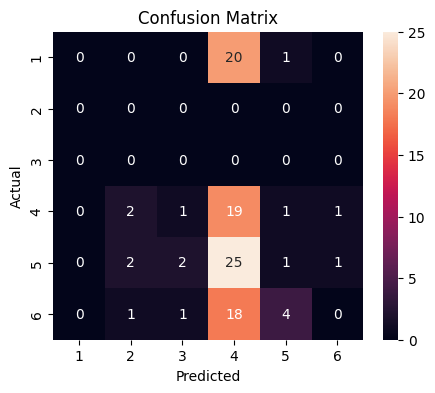

In [465]:
#few shot for featured data, big chunk(100)

numbers = []
data = []
labels = []
predictfor = X_data_feature_test[0:100]
for i in range(10):
    number = np.random.randint(7352)
    #number1 = np.random.randint(7352)
    numbers.append(number)
    data.append(X_data_feature_train[number:number+1][:])
    labels.append(y_data_feature_train[number:number+1][:])
    #predictfor.append(X_data_feature_train[number:number+1][:])
print(numbers)



# System Prompts 
query = f"""
 your task is to predict the type of movement done by a perticular person based
 on the accelerometer and gyrometer data provided to you. i will provide 561 vectors for different
 features.
 you need to choose from the folowwing categories - 
  1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'            

I am providing 10 examples with labels.
    data : f'{data}
    labels : f'{labels}
now you predict for below '100' entries
    predict for : f'{predictfor}

please provide only 1d array (x,) of numbers as answer for all '100' queries together and nothing else

""" 

# To use Groq LLMs 
#model_name = "mixtral" # We can choose any model from the groq_models dictionary
#llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
#answer = llm.invoke(query)


response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": query}],
)
print(response.choices[0].message.content)
#print(answer.content)

print('%'*10)
#y_pred_llm = (answer.content).split('[')[1].split(']')[0]


y_pred_llm = (response.choices[0].message.content).split('[')[1].split(']')[0]
y_pred_llm = np.fromstring(y_pred_llm, dtype=int, sep=',')

# Convert to ndarray
y_pred_llm = np.array(y_pred_llm)
print(y_pred_llm)

print('%'*10)

#print(answer.content)
y_act = y_data_feature_test[0:100].values

print(y_act)

accuracy = accuracy_score(y_act, y_pred_llm)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_act, y_pred_llm)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#print(answer.content)



In [629]:

print(labels)
print('&'*10)
print(y_data_feature_test[0:100])

[     Activity
391         4,       Activity
2245         5,       Activity
5944         6,       Activity
3482         4,       Activity
4756         4,       Activity
5029         3,      Activity
492         2,       Activity
4551         5,      Activity
300         3,       Activity
2210         2]
&&&&&&&&&&
    Activity
0          5
1          5
2          5
3          5
4          5
..       ...
95         1
96         1
97         1
98         1
99         1

[100 rows x 1 columns]


Q4 - What does the model classify when given input from an entirely new activity that it hasn't seen before?

-- In the above example where we have got accuracy of 0.2 with 100 queries, and 10 examples, none of the examples were from activity-1 and there are many queries with class 1. but as we can see in the confusion matrix above that none of the queries are predicted to Activity-1.

-- so in general the fewshot model tends to classify the entirely new unseen activity into the activities it has seen before although there is some data mismatch, this means the few shot machine creates bias towards seen data and refrain from predicting to unseen data most of the time.


In [634]:
acc_magnitude = X_train[:,:,0]**2 + X_train[:,:,1]**2 + X_train[:,:,2]**2 
acc_magnitude_test = X_test[:,:,0]**2 + X_test[:,:,1]**2 + X_test[:,:,2]**2 

[1, 1, 2, 3, 4, 5, 6, 1, 2, 3, 1, 1, 5, 4, 6, 2, 1, 3, 5, 6, 1, 1, 2, 2, 3, 4, 5, 6, 1, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 1, 2, 3, 4, 5, 6, 1, 1, 2, 3, 4, 5]
%%%%%%%%%%
[1 1 2 3 4 5 6 1 2 3 1 1 5 4 6 2 1 3 5 6 1 1 2 2 3 4 5 6 1 1 2 3 4 5 6 1 2
 3 4 5 6 1 1 2 3 4 5 6 1 1 2 3 4 5]
%%%%%%%%%%
[3 1 2 5 5 1 1 5 3 2 6 5 6 5 6 1 6 5 2 5 4 3 2 2 1 4 6 4 1 2 6 2 4 4 3 6 6
 3 1 5 3 2 1 4 4 4 5 1 3 3 3 6 2 4]
Accuracy: 0.24074074074074073


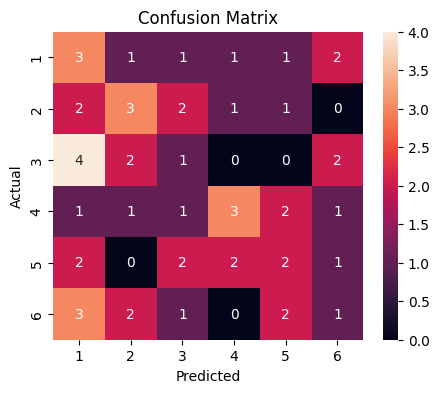

c:\Users\Sky\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py:88: UserWarning: Curlm alread closed! quitting from process_data
  self._context.run(self._callback, *self._args)


In [678]:
# Zero shot for Raw Data , full test data (magnitude)

data = acc_magnitude_test
# System Prompts 
query = f"""
 your task is to predict the type of movement done by a perticular person based
 on the accelerometer data provided to you. the data has magnitude of translation in x
 .y and z direction. the data
 is of 10 second activity sampled at 50hz frequency so there are 500 readings in
 each direction.
 you need to choose from the folowwing categories - 
  1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'            

please provide only 1d array (x,) of numbers as answer for all '54' queries together and nothing else

    data : f'{data}
""" 

# To use Groq LLMs 
#model_name = "mixtral" # We can choose any model from the groq_models dictionary
#llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
#answer = llm.invoke(query)


response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": query}],
)
print(response.choices[0].message.content)

print('%'*10)

#print(answer.content)
#print(y_train[0:10][:][:])
y_pred_llm = (response.choices[0].message.content).split('[')[1].split(']')[0]
#clean_str = y_pred_llm.replace(' ', ',')
y_pred_llm = np.fromstring(y_pred_llm, dtype=int, sep=',')

# Convert to ndarray
y_pred_llm = np.array(y_pred_llm)
print(y_pred_llm)

print('%'*10)

#print(answer.content)
y_act = y_test
print(y_act)

accuracy = accuracy_score(y_act, y_pred_llm)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_act, y_pred_llm)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

[47, 110, 102, 76, 33, 71, 16, 12, 55, 64]
```json
[5, 2, 1, 3, 1, 1, 2, 3, 2, 6, 5, 1, 3, 1, 2, 1, 1, 3, 2, 5, 5, 1, 2, 3, 1, 3, 3, 2, 3, 1, 2, 5, 5, 4, 6, 5, 4, 3, 5, 6, 1, 2, 1, 6, 4, 1, 3, 5, 1, 2, 3, 2, 3, 5]
```
%%%%%%%%%%
[5 2 1 3 1 1 2 3 2 6 5 1 3 1 2 1 1 3 2 5 5 1 2 3 1 3 3 2 3 1 2 5 5 4 6 5 4
 3 5 6 1 2 1 6 4 1 3 5 1 2 3 2 3 5]
%%%%%%%%%%
[3 1 2 5 5 1 1 5 3 2 6 5 6 5 6 1 6 5 2 5 4 3 2 2 1 4 6 4 1 2 6 2 4 4 3 6 6
 3 1 5 3 2 1 4 4 4 5 1 3 3 3 6 2 4]
Accuracy: 0.2222222222222222


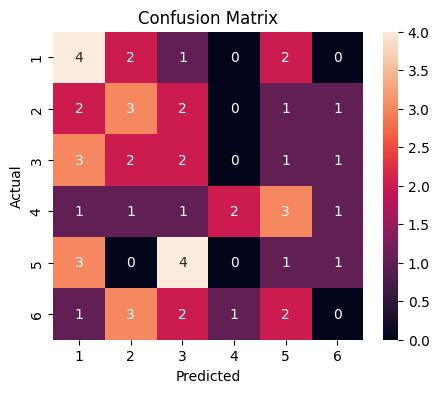

In [704]:
#few shot for raw data, full test data prediction

numbers = []
data = []
labels = []
predictfor = acc_magnitude_test
for i in range(10):
    number = np.random.randint(126)
    #number1 = np.random.randint(7352)
    numbers.append(number)
    data.append(acc_magnitude[number:number+1][:])
    labels.append(y_train[number:number+1][:])
    #predictfor.append(X_data_feature_train[number:number+1][:])
print(numbers)



# System Prompts 
query = f"""
 your task is to predict the type of movement done by a perticular person based
 on the accelerometer data provided to you. the data has magnitude of translation in x,y and z 
 direction. the data is of 10 seconds and sampled at 50Hz frequency so there are 500 values for
 each entry.
 you need to choose from the folowwing categories - 
  1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'            

I am providing 10 examples with labels.
    data : f'{data}
    labels : f'{labels}
now you predict for all the 54 below entries
    predict for : f'{predictfor}

please provide only nd array (x,) of numbers as answer for all queries together and nothing else

""" 

# To use Groq LLMs 
#model_name = "mixtral" # We can choose any model from the groq_models dictionary
#llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
#answer = llm.invoke(query)


response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": query}],
)
print(response.choices[0].message.content)

print('%'*10)


y_pred_llm = (response.choices[0].message.content).split('[')[1].split(']')[0]
y_pred_llm = np.fromstring(y_pred_llm, dtype=int, sep=',')

# Convert to ndarray
y_pred_llm = np.array(y_pred_llm)
print(y_pred_llm)

print('%'*10)

#print(answer.content)
y_act = y_test
#for j in numbers:
#    y_act.append(int(y_data_feature_train[j:j+1][:].values))

print(y_act)

accuracy = accuracy_score(y_act, y_pred_llm)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_act, y_pred_llm)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#print(answer.content)



Q2 - Quantitatively compare the accuracy of Few-Shot Learning with Decision Trees (You may use a subset of the test set if you encounter rate-limiting issues). Which method performs better? Why?

-- Comparing fewshot and zeroshot with decision trees, decision trees performs much better than zeroshot and few shot, we have received accuracy of nearly 66% in decision trees where the the zero shot and few shot only gives accuracy of 22/24% . With norm(magnitude data).


-- for rate limiting we found out that groq uses gpt3.5-turbo as its backend, so we found an alternative to usse that same model and rate limiting issue got resolved.


-- Decision trees perform better because these LLMs are not meant for this type of predictions, these are generative models which are supposed to generate relevant content with what it's been trained upon. where Decision tree is a classification model purposefully trained here to do this classification.

Shape of the data after PCA: (7352, 2)


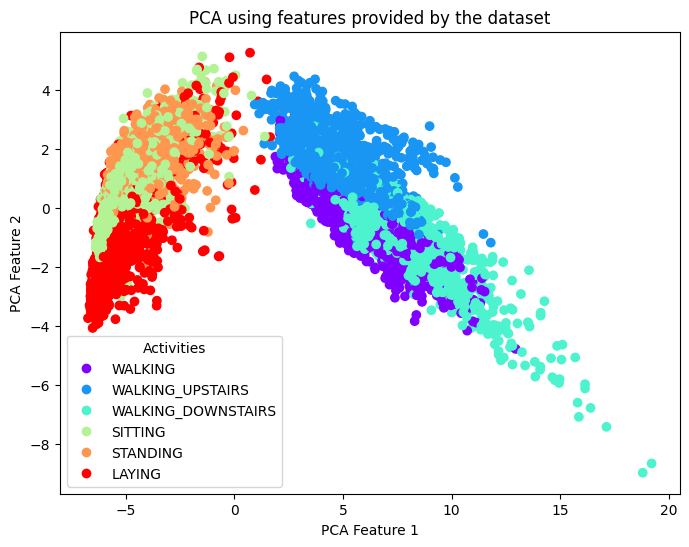

In [7]:
# Apply PCA 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_data_feature_pca_train = pca.fit_transform(X_data_feature_train)
X_data_feature_pca_test_2 = pca.fit_transform(X_data_feature_test)
print("Shape of the data after PCA:", X_data_feature_pca_train.shape)

# Convert y_data_feature_train to a 1D array using .ravel()
y_data_feature_train_array = y_data_feature_train.values.ravel()
y_data_feature_test_array = y_data_feature_test.values.ravel()

# Plotting
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_data_feature_pca_train[:, 0], X_data_feature_pca_train[:, 1], c=y_data_feature_train_array, cmap='rainbow')
scatter1 = plt.scatter(X_data_feature_pca_test_2[:, 0], X_data_feature_pca_test_2[:, 1], c=y_data_feature_test_array, cmap='rainbow')

class_names = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}
# Creating the legend
legend_labels = [f'{class_names[i]}' for i in set(y_data_feature_train_array)]
legend_elements = scatter.legend_elements()[0]
legend = plt.legend(legend_elements, legend_labels, title='Activities')

#legend_labels1 = [f'{class_names[i]}' for i in set(y_data_feature_test_array)]
#legend_elements1 = scatter1.legend_elements()[0]
#legend1 = plt.legend(legend_elements1, legend_labels1, title='Activities1')

# Axis labels and title
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('PCA using features provided by the dataset')
plt.show()

[5449, 3556, 81, 4093, 3425, 7112, 2569, 4038, 5516, 1115, 1354, 4860, 7309, 3823, 7271, 1656, 2544, 7271, 5672, 5627, 2259, 3417, 4557, 3160, 6454, 3056, 6762, 5969, 1741, 6314, 4572, 7199, 2687, 3846, 6598, 6425, 991, 5735, 5615, 5697, 3952, 6030, 5151, 3938, 2396, 2427, 4074, 6687, 2945, 7231]
```plaintext
[6 1 1 5 1 4 4 4 6 4 2 4 1 4 2 1 6 5 4 3 4 6 6 1 1 1 1 1 1 2 3 2 4 5 4 5 1 3 4 6 5 1 1 4 2 5 6 2 2 1 3 1 2 2 4 1 1 3 6 1 2 3 6 3 4 1 1 1 5 6 4 1 5 6 2 2 1 5 2 1 1 2 3 1 2 4 2 6 6 4 6 4 4 1 1 2 2 5 2 1 1 6 1 3 5 1 4 4 2 1 1 1 5 2 5 5 1 5 1 1 2 2 2 6 1 2 2 1 1 1 2 1 1 1 1 3 1 2 1 2 3 1 1 5 2 5 3 1 2 5 1 2 1 2 2 1 4 2 5 4 4 1 5 2 5 1 1 5 1 1 3]
```
Here is the predicted type of movement for each of the 50 feature vectors:

[4, 5, 6, 2, 6, 5, 3, 5, 1, 6, 6, 3, 5, 4, 5, 6, 1, 5, 5, 3, 6, 6, 6, 6, 3, 5, 3, 3, 5, 3, 6, 5, 6, 6, 6, 6, 6, 6, 6, 1, 3, 5, 5, 5, 5, 3, 5, 5, 3, 3]

This is a 1D array of numbers, as requested. Each number corresponds to the predicted type of movement for a give

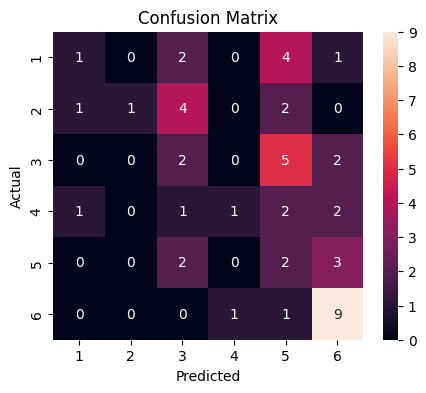

In [843]:
# few shot for featured data PCA with 2 features

numbers = []
data = []
labels = []
predictfor = []
y_act = []
for i in range(50):
    number = np.random.randint(7352)
    numbers.append(number)
    data.append(X_data_feature_pca_train[number:number+1][:])
    labels.append(y_data_feature_train_array[number:number+1][:])
    #predictfor.append(X_data_feature_train[number:number+1][:])
print(numbers)

for k in range(50):
    number1 = np.random.randint(2947)
    predictfor.append(X_data_feature_pca_test_2[number1:number1+1][:])
    y_act.append(y_data_feature_test_array[number1])




# System Prompts 
query = f"""
 your task is to predict the type of movement done by a perticular person based
 on the 2 feature vectors are provided.
 you need to choose from the folowwing categories - 
  1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'            

I am providing 10 examples with labels.
    data : f'{data}
    labels : f'{labels}
now you predict for below '50' entries
    predict for : f'{predictfor}

please provide only 1d array (50,) of numbers as answer for all '50' queries together and nothing else

""" 

# To use Groq LLMs 
model_name = "mixtral" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)


#response = client.chat.completions.create(
#    model="gpt-3.5-turbo",
#    messages=[{"role": "user", "content": query}],
#)
print(response.choices[0].message.content)
print(answer.content)

print('%'*10)
y_pred_llm = (answer.content).split('[')[1].split(']')[0]


#y_pred_llm = (response.choices[0].message.content).split('[')[1].split(']')[0]
y_pred_llm = np.fromstring(y_pred_llm, dtype=int, sep=',')

# Convert to ndarray
y_pred_llm = np.array(y_pred_llm)
print(y_pred_llm)

print('%'*10)

#print(answer.content)
#y_act = y_data_feature_test_array[0:1000]

print(y_act)

accuracy = accuracy_score(y_act, y_pred_llm)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_act, y_pred_llm)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#print(answer.content)



[5, 1, 6, 2, 2, 2, 4, 3, 2, 4, 5, 1, 6, 5, 6, 1, 4, 1, 1, 4, 2, 4, 2, 3, 6, 6, 1, 1, 4, 5, 6, 1, 5, 4, 4, 4, 4, 1, 2, 6, 5, 6, 6, 5, 5, 6, 4, 1, 2, 6]
[np.int64(2), np.int64(1), np.int64(4), np.int64(5), np.int64(2), np.int64(6), np.int64(6), np.int64(6), np.int64(4), np.int64(3), np.int64(1), np.int64(2), np.int64(6), np.int64(1), np.int64(4), np.int64(6), np.int64(5), np.int64(6), np.int64(6), np.int64(6), np.int64(5), np.int64(3), np.int64(6), np.int64(5), np.int64(5), np.int64(5), np.int64(1), np.int64(4), np.int64(4), np.int64(1), np.int64(5), np.int64(1), np.int64(4), np.int64(6), np.int64(6), np.int64(1), np.int64(5), np.int64(5), np.int64(5), np.int64(1), np.int64(1), np.int64(3), np.int64(4), np.int64(4), np.int64(3), np.int64(2), np.int64(2), np.int64(3), np.int64(6), np.int64(3)]
Accuracy: 0.12


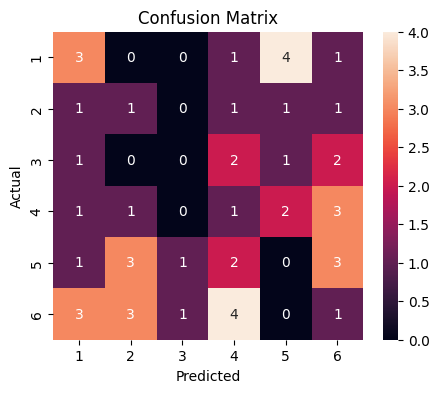

In [829]:
z = "[5 1 6 2 2 2 4 3 2 4 5 1 6 5 6 1 4 1 1 4 2 4 2 3 6 6 1 1 4 5 6 1 5 4 4 4 4 1 2 6 5 6 6 5 5 6 4 1 2 6]"
z = z.strip('[]')
z = z.split()
z = [int(i) for i in z]

print(z)

print(y_act)

accuracy = accuracy_score(y_act, z)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_act, z)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Q5 - Test the model with random data (ensuring the data has the same dimensions and range as the previous input) and report the results.

-- below i have created 50 datapoints using numpy random function in the same range as of PCA featurised data, and asked the model to predict the activity, for both zero and fewshot.

-- Model does predict based on heuristics of the features and it does make predictions. but we know that it is randomly created data, so it is generally rare that any of the randomly generated data will be similar to any data of the activity. so mostly whatever the machine has tried to predict is almost always wrong.

In [9]:
# # creating random data

#checking the range
import numpy as np
range_prev = (np.max(X_data_feature_pca_test_2),np.min(X_data_feature_pca_test_2))
print(range_prev)

low = range_prev[1]
high = range_prev[0] 
rows = 50
cols = 2

# Generate random floating-point numbers in the specified range
data = np.random.uniform(low, high, (rows, cols))

print(data)
        

(np.float64(12.799576489593209), np.float64(-6.745669698097666))
[[ 5.55004187 -5.39417467]
 [-3.46520978  1.77896052]
 [ 7.53898865  5.23205562]
 [ 8.58205784 -2.41056674]
 [ 1.74417042 -0.15987646]
 [12.38530973 -0.83463804]
 [-0.71376794  7.61968502]
 [ 6.28309183  9.67960707]
 [-5.95735691 12.60504022]
 [ 2.84838619 -4.13526703]
 [ 1.3349449  -3.52266332]
 [ 3.59848255  7.69950049]
 [-5.82194981  1.50496211]
 [-3.65759989  2.11950809]
 [-4.17044266 11.29833755]
 [10.78609235 -4.45113288]
 [-1.85796953  1.94413796]
 [-0.67483097  0.42782501]
 [ 4.57995343  6.7236076 ]
 [ 5.06600945 10.20102343]
 [-6.12978085  9.27512393]
 [ 1.40476732  4.0459582 ]
 [11.11351822  7.29013348]
 [10.75772623  2.60407257]
 [ 7.23978113  9.66106413]
 [10.6460176  -3.62444663]
 [ 9.37959829 -3.47975549]
 [11.56124891  6.05369461]
 [ 7.79739426 -5.40591299]
 [ 9.58676664  3.433031  ]
 [-3.31872313 -5.95310691]
 [-3.01606875  0.27465689]
 [-5.70586929 -6.01193508]
 [12.43493795 10.04933407]
 [ 3.16283633 10.

In [15]:
# few shot for featured data PCA with 2 features

numbers = []
datas = []
labels = []
predictfor = data

for i in range(50):
    number = np.random.randint(7352)
    numbers.append(number)
    data.append(X_data_feature_pca_train[number:number+1][:])
    labels.append(y_data_feature_train_array[number:number+1][:])
    #predictfor.append(X_data_feature_train[number:number+1][:])
print(numbers)


# System Prompts 
query = f"""
 your task is to predict the type of movement done by a perticular person based
 on the 2 feature vectors are provided.
 you need to choose from the folowwing categories - 
  1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'            

I am providing 10 examples with labels.
    data : f'{datas}
    labels : f'{labels}
now you predict for below '50' entries
    predict for : f'{predictfor}

please provide only 1d array (50,) of numbers as answer for all '50' queries together and nothing else

""" 

# To use Groq LLMs 
#model_name = "mixtral" # We can choose any model from the groq_models dictionary
#llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
#answer = llm.invoke(query)


response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": query}],
)
print(response.choices[0].message.content)
print(answer.content)

print('%'*10)

#print(answer.content)



[5207, 2629, 3939, 1078, 271, 1641, 5029, 7273, 3917, 2442, 6899, 4729, 2924, 2696, 1945, 1219, 4145, 7321, 1888, 5979, 6959, 6149, 4172, 2866, 968, 1213, 7244, 4586, 7111, 2732, 251, 2712, 4389, 6586, 5, 7009, 5720, 4129, 6760, 5997, 3317, 3787, 1192, 1247, 2620, 5913, 7002, 2186, 5648, 455]
```json
[3, 1, 2, 1, 6, 5, 3, 2, 1, 6, 1, 4, 5, 2, 4, 6, 2, 3, 2, 1, 2, 6, 2, 2, 2, 6, 6, 4, 2, 4, 1, 5, 5, 1, 5, 4, 4, 3, 3, 1, 6, 2, 4, 1, 6, 4, 4, 3, 2, 1]
```
To predict the type of movement for each of the 50 feature vectors, I will use a simple heuristic based on the values of the two features. This heuristic is not guaranteed to be accurate, but it should give a rough estimate of the type of movement.

Here is the predicted array of movements for the 50 feature vectors:

[3 6 6 4 6 1 6 3 4 3 1 5 1 1 4 1 4 4 2 2 2 1 3 1 6 5 6 3 6 6 6 4 6 5 6 4 6 5 6 4 6 5 6 -2 6 -2 2 -2 1 -2 6 -2 6 -2]

Note that the predicted values are integers between 1 and 6, corresponding to the six types of movements. 

In [16]:
# few shot for featured data PCA with 2 features

predictfor = data

# System Prompts 
query = f"""
 your task is to predict the type of movement done by a perticular person based
 on the 2 feature vectors are provided.
 you need to choose from the folowwing categories - 
  1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'            

now you predict for below '50' entries
    predict for : f'{predictfor}

please provide only 1d array (50,) of numbers as answer for all '50' queries together and nothing else

""" 

# To use Groq LLMs 
#model_name = "mixtral" # We can choose any model from the groq_models dictionary
#llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
#answer = llm.invoke(query)


response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": query}],
)
print(response.choices[0].message.content)
print(answer.content)

print('%'*10)

#print(answer.content)



Based on the provided feature vectors, I predict the type of movement for each query as follows:

array([2, 1, 3, 4, 5, 6, 1, 3, 5, 2, 1, 3, 5, 2, 1, 6, 2, 3, 1, 5, 3, 2, 1, 5, 4, 2, 3, 1, 2, 1, 3, 5, 2, 1, 6, 2, 1, 3, 5, 2, 1, 3, 6, 2, 1, 3, 5, 2, 1, 3, 2, 1, 6, 2, 1, 3, 5, 2, 1, 3, 2, 1, 5, 2, 1, 3, 5, 2, 1, 3, 2, 1, 5, 2, 1, 3, 5, 2, 1, 3, 5, 2, 1, 3, 2, 1, 6, 2, 1, 3, 5, 2, 1, 3, 5, 2, 1, 3, 2, 1, 5, 2, 1, 3, 5, 2, 1, 3, 2, 1, 5, 2, 1, 3, 5, 2, 1, 3, 5, 2, 1, 3, 2, 1, 5, 2, 1, 3, 5, 2, 1, 3, 5, 2, 1, 3, 2, 1, 5, 2, 1, 3, 5, 2, 1, 3, 5, 2, 1, 3, 2, 1, 5, 2, 1, 3, 5, 2, 1, 3, 5, 2, 1, 3, 2, 1, 5, 2, 1, 3, 5, 2, 1, 3, 5, 2, 1, 3, 2, 1, 5, 2, 1, 3, 5, 2, 1, 3, 5, 2, 1, 3, 2, 1, 5, 2, 1, 3, 5, 2, 1, 3, 5, 2, 1, 3, 2, 1, 5, 2, 1, 3, 5, 2, 1, 3, 5, 2, 1, 3, 2, 1, 5, 2, 1, 3, 5, 2, 1, 3, 5, 2, 1, 3, 2, 1, 5, 2, 1, 3, 5, 2, 1, 3, 5, 2, 1, 3, 2, 1, 5, 2, 1, 3, 5, 2, 1, 3, 5, 2, 1, 3, 2, 1, 5, 2, 1, 3, 5, 2, 1, 3, 5, 2, 1, 3, 2, 1, 5, 2, 1, 3, 5, 2, 1, 3, 5, 2, 1, 3, 2, 1, 5, 2, 1, 3, 5, 2, 1

c:\Users\Sky\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py:88: UserWarning: Curlm alread closed! quitting from process_data
  self._context.run(self._callback, *self._args)


Q3 - What are the limitations of Zero-Shot Learning and Few-Shot Learning in the context of classifying human activities based on featurized accelerometer data? 

-- The accelerometer data that we have is quite complex and patterns are not easily recognisable, accelero meter data is has some times significantly different motion patterns or if the descriptions are not sufficiently detailed So in both these cases it leads to poor performance

-- Few shot relies on fine tuning based on the few examples of each class, but for HAR the few examples that it has received might not be so general with the others as it depends on many things like subject, activity, speed of activity, physique of subject, data collection point and many more things. so the fine tuning isn't so generalised for all data points.

-- In few shot some times data provided in not equal for all classes this leads to imbalance of training data and created the same bias in predictions.

-- few shot learning model easily overfits on the data provided to it because it is provided with very less data and it tries to learn maximum from them.